<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [704]:
import pandas as pd
import psycopg2
import gc
import plotly.express as px
import plotly.graph_objects as go

In [705]:
#данные для подключения к БД
#название бд
DBNAME = 'project_sql'
#пользователь, под которым входим в бд
USER = 'skillfactory'
#пароль пользователя, под которым входим в бд
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
#адрес сервера бд
HOST = '84.201.134.129'
#порт на котором работает сервер баз данных
PORT = 5432

In [706]:

#создаем объект - коннектор к бд(через него будем отправлять запросы)
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [707]:
#подсчитывааем все строки из таблицы vacancies
query = f'''select count(*)
           from vacancies
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#отдельно пишем число вакансий в переменную
vacancies = df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3232147243.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [708]:
print(f'Всего вакансий: {vacancies}')

Всего вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [709]:
#считаем все строки в таблицу employers
query = f'''select count(*)
           from employers
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#отдельно пишем число работодателей в переменную
employers = df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2924951706.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [710]:
print(f'Количество работодателей: {employers}')

Количество работодателей: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [711]:
#считаем все строки в таблице areas
query = f'''select count(*)
           from areas
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#отдельно пишем число регионов в переменную
areas = df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3469224083.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [712]:
print(f'Количество регионов: {areas}')

Количество регионов: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [713]:
#считаем все строки в таблицу industries
query = f'''select count(*)
           from industries
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#отдельно пишем число сфер деятельности в переменную
industries = df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2747607974.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [714]:
print(f'Число сфер деятельности работодателей: {industries}')

Число сфер деятельности работодателей: 294


***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [715]:
#выбираем названия регионов, считаем те из них, которые присутствуют в таблице vacancies
#группируем по названию регионов, сортируем по убыванию
#выбираем первые 5
#если хотит узнать все регионы, можно убрать limit 5, но по заданию нам все не нужны
#в целом, я так и сделал, а число выводимых на графике регионов регулирует константа MAX_AREAS
query = f'''select areas.name, count(areas.name) as cnt
from areas, vacancies 
where areas.id = vacancies.area_id
group by areas.name
order by cnt desc
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)


C:\Users\HP\AppData\Local\Temp\ipykernel_1076\1274806073.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Число вакансий в каждом из регионов(от самых популярных у работодателей к не очень популярным):
                name   cnt
0             Москва  5333
1    Санкт-Петербург  2851
2              Минск  2112
3        Новосибирск  2006
4             Алматы  1892
..               ...   ...
764       Тарко-Сале     1
765    Новоаннинский     1
766            Бирск     1
767           Сасово     1
768             Анна     1

[769 rows x 2 columns]


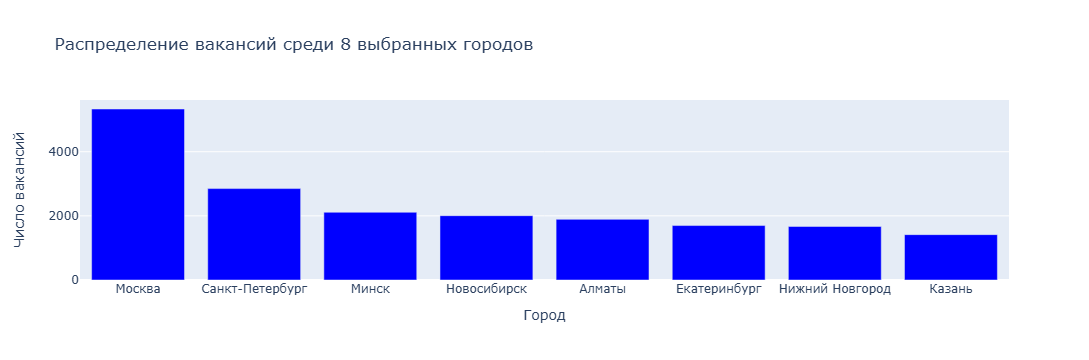

In [716]:
#благодаря кастомизации вывода мы можем регулировать число выводимых городов
print('Число вакансий в каждом из регионов(от самых популярных у работодателей к не очень популярным):')
print(df)
MAX_AREAS = 8
locations = [None] * MAX_AREAS
vac_values = [None] * MAX_AREAS
counter = 0
while counter < MAX_AREAS:
    locations[counter] = df['name'].iloc[counter]
    vac_values[counter] = df['cnt'].iloc[counter]
    counter += 1
fig1 = px.bar(x = locations,y=vac_values, title=f'Распределение вакансий среди {MAX_AREAS} выбранных городов',
              labels = {'x': 'Город', 'y': 'Число вакансий'},color_discrete_sequence=['blue'])
fig1.show()

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [717]:
#считаем строки в таблице vacancies, 
#где хотя бы одно из полей зп ненулевое(или стартовая или конечная)
query = f'''select count(*) from vacancies 
where salary_from is not null or salary_to is not null
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
count_not_null_zp = df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2352731931.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [718]:
print(f'У {count_not_null_zp} вакансий указана зарплата')

У 24073 вакансий указана зарплата


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [719]:
#запрос на среднюю нижнюю границу зп, округленную до целого из таблицы vacancies
query_salary_from = f'''select round(avg(salary_from)) from vacancies 
        '''
#отправляем запрос к БЛ, получаем результат
df_salary_from = pd.read_sql_query(query_salary_from, connection)
#запрос на среднюю верхнюю границу зп, округленную до целого из таблицы vacancies
query_salary_to = f'''select round(avg(salary_to)) from vacancies 
        '''
#отправляем запрос к БЛ, получаем результат
df_salary_to = pd.read_sql_query(query_salary_to, connection)

mean_salary_from = df_salary_from.iloc[0].item()
mean_salary_to  = df_salary_to.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3225089303.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3225089303.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [720]:
print(f'Средняя предлагаемая зарплата от {int(mean_salary_from)} рублей')
print(f'Средняя предлагаемая зарплата до {int(mean_salary_to)} рублей')

Средняя предлагаемая зарплата от 71065 рублей
Средняя предлагаемая зарплата до 110537 рублей


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [721]:
#выбираем поля: счетчик строк выборки из таблицы вакансий, тип рабочего графика, тип трудоустройства
#суть: выбираем все сочетания типа графика и типа занятости и считаем количество вакансий по каждому из сочетаний
#оставляем только первые два в сортированной по убыванию выборке
#если хотит узнать все варианты рабочего графика, можно убрать limit 2, но по заданию это не нужно
query = f'''select count(*) as cnt, vacancies.schedule, vacancies.employment from vacancies
group by vacancies.schedule, vacancies.employment
order by cnt desc
limit 2;
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4050656023.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [722]:
print('Вторая по популярности среди работодателей комбинация графика и занятости:')
print(df.iloc[1])

Вторая по популярности среди работодателей комбинация графика и занятости:
cnt                       7802
schedule      Удаленная работа
employment    Полная занятость
Name: 1, dtype: object


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [723]:
#делаем выборку всех вариантов требуемого опыта работы и подсчитываем их количество 
#сортируя по возрастанию
query = f'''select count(*) as cnt, vacancies.experience from vacancies
group by vacancies.experience
order by cnt
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3025064599.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [724]:
print('Градация числа вакансий в зависимости от опыта работы:')
print(df)

Градация числа вакансий в зависимости от опыта работы:
     cnt          experience
0   1337         Более 6 лет
1   7197           Нет опыта
2  14511       От 3 до 6 лет
3  26152  От 1 года до 3 лет


1) Основная масса вакансий сконцентрирована в городах:  Москва, Санкт-Петербург, Минск, Новосибирск , Алматы
2) 51% работодателей указывает уровень зп хотя бы частично
3) Зарплаты в среднем варьируются от 71.065 рублей до 110.537 рублей
Предполагаю, что данные могут быть искажены в пользу регионов или крупных городов. В доп исследовании проверим.
4) Вторая по популярности у работодателей форма занятости - удаленная работа с полной занятостью. 
Очевидно, что первая всегда будет полный день полная занятость, если выгрузка честная без фильтра по какому - либо значению
5) Опыт работы распределен следующим образом: Более 6 лет,Нет опыта, От 3 до 6 лет, От 1 года до 3 лет.
Понятно, что нужны в основном крепкие середняки с опытом от 1 года до 3 лет, такие соискатели покрывают более 50% потребностей компаний.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [725]:
#делаем выборку работодателей и подсчитываем ,сколько у кого есть вакансий
#сортируем по убыванию, берем всех, но в отрисовке укажем, сколько нужно константой MAX_EMP
query = f'''select employers.name, count(vacancies.name) as cnt
from employers, vacancies 
where employers.id = vacancies.employer_id
group by employers.name
order by cnt desc
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#выделяем 1 и 5 работодателей
first_emp = df['name'].iloc[0]
first_vac = df['cnt'].iloc[0]
second_emp = df['name'].iloc[4]
second_vac = df['cnt'].iloc[4]


C:\Users\HP\AppData\Local\Temp\ipykernel_1076\893927092.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



На первом месте компания Яндекс c 1933 числом вакансий
На пятом месте компания Газпром нефть c 331 числом вакансий


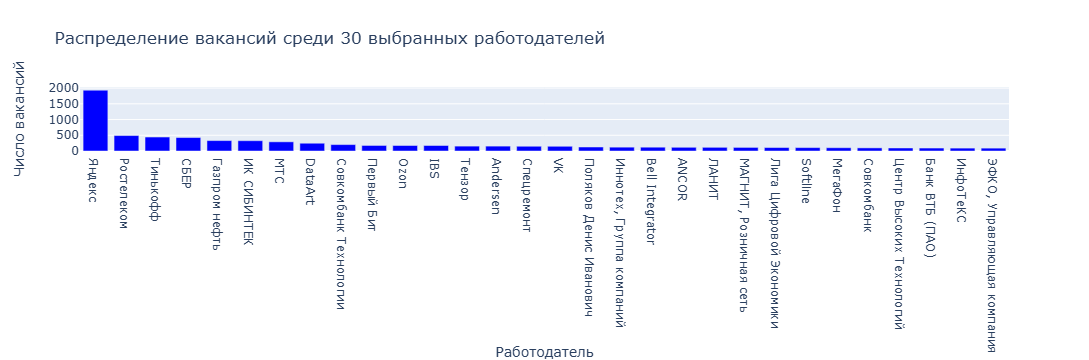

3008

In [726]:
#указываем первого и пятого работодателей
print(f'На первом месте компания {first_emp} c {first_vac} числом вакансий')
print(f'На пятом месте компания {second_emp} c {second_vac} числом вакансий')
#отрисовываем MAX_EMP работодателей на диаграмме
#изначально хотел еще добавить круговую диаграмму, но у Яндекса такой отрыв, что это бессмысленно
#так как лидерство очевидно
MAX_EMP = 30
employersl = [None] * MAX_EMP
vac_values = [None] * MAX_EMP
counter = 0
while counter < MAX_EMP:
    employersl[counter] = df['name'].iloc[counter]
    vac_values[counter] = df['cnt'].iloc[counter]
    counter += 1
fig1 = px.bar(x = employersl,y=vac_values, title=f'Распределение вакансий среди {MAX_EMP} выбранных работодателей',
              labels = {'x': 'Работодатель', 'y': 'Число вакансий'},color_discrete_sequence=['blue'])
fig1.show()
del fig1
gc.collect()

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [727]:
#важно!! Если отправить в базу один большой запрос ,у меня он не выполнился и за 5 минут.
#поэтому разбил на два запроса, объединил две таблицы в одну, отфильтровал по числу вакансий(cnt_vac == 0) и отсортировал по возрастанию
#немного костыльно, но зато все этапы прозрачны и понятны

#1 этап - выбираем регионы и посчитываем в них количество вакансий, присоединив таблицу vacancies
query1 = f'''select 
    areas.name, 
    count(distinct vacancies.id) as cnt_vac
from areas
left join vacancies on areas.id = vacancies.area_id
group by areas.name
order by cnt_vac desc;
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query1, connection)
#2 этап - выбираем регионы и посчитываем в них количество работодателей, присоединив таблицу employers
query2 = f'''select 
    areas.name, 
    count(distinct employers.id) as cnt_emp
from areas
left join employers on areas.id = employers.area
group by areas.name
order by cnt_emp desc;
'''
#отправляем запрос к БЛ, получаем результат
df1 = pd.read_sql_query(query2, connection)
#соединяем две таблицы в одну средствами pandas
df_merged = pd.merge(df, df1, on='name', how='inner')

df_merged_tmp = df_merged[df_merged['cnt_vac'] == 0].sort_values(by = 'cnt_emp').iloc[-1]
null_vac_top_area = df_merged_tmp['name']
null_vac_top_cnt_emp = df_merged_tmp['cnt_emp']
#заняли дополнительную память, надо вернуть
del df_merged_tmp
gc.collect()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2305790132.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2305790132.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



0

In [728]:
#чтобы не засорять ноутбук, выведет топ 5 регионов
print('Топ 5 регионов по числу вакансий')
print(df_merged.head(5))
#выбираем из таблицы тех, у кого нет вакансий и сортируем по возрастанию числа работодателей
#выводим самого последнего
print(f'{null_vac_top_area} без вакансий, но с {null_vac_top_cnt_emp} работодателями')


Топ 5 регионов по числу вакансий
              name  cnt_vac  cnt_emp
0           Москва     5333     5864
1  Санкт-Петербург     2851     2217
2            Минск     2112     1115
3      Новосибирск     2006      573
4           Алматы     1892      721
Россия без вакансий, но с 410 работодателями


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [729]:
#выбираем работодателей и считаем для них число регионов
#в принципе, код делает ровно тр, что по заданию: выборка, посчет, группировка, сортировка
query = f'''select employers.name, count(distinct vacancies.area_id) as cnt_areas
from employers, vacancies
where vacancies.employer_id = employers.id
group by employers.name
order by cnt_areas desc
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
most_count_area_emp = df['name'].iloc[0]
most_count_area_cnt = df['cnt_areas'].iloc[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\688519738.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [730]:
print('Топ 5 работодателей по числу вакансий:')
print(df_merged.head(5))
print(f'У компании {most_count_area_emp} есть наибольшее число регионов найма: {most_count_area_cnt}')

Топ 5 работодателей по числу вакансий:
              name  cnt_vac  cnt_emp
0           Москва     5333     5864
1  Санкт-Петербург     2851     2217
2            Минск     2112     1115
3      Новосибирск     2006      573
4           Алматы     1892      721
У компании Яндекс есть наибольшее число регионов найма: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [731]:
#немного схитрил: посчитал работодателей, у которых УКАЗАНА сфера деятельности и вычел из общего количетства(это мы получили попутно
#в самом начаое
query = f'''select count(distinct employers_industries.employer_id) 
from employers, employers_industries
where employers.id = employers_industries.employer_id
        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
emp_null_industries = employers - df.iloc[0].item()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\1874104886.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



У 8419 работодателей не указана сфера деятельности


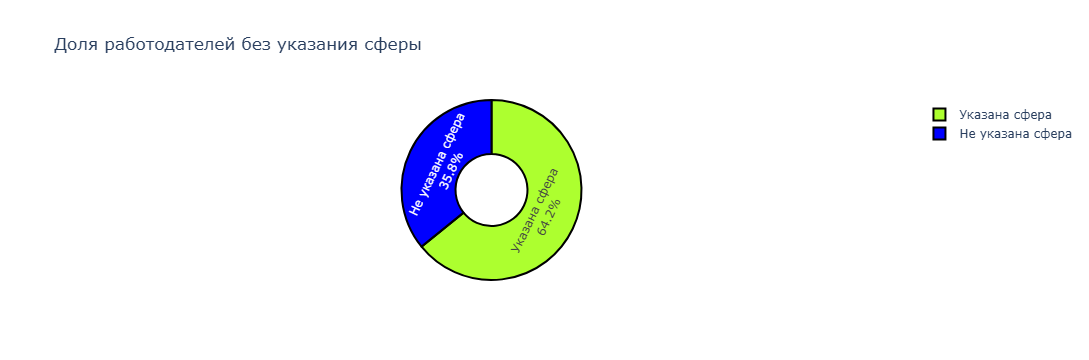

In [732]:
#выводим число работодателей без указания сферы деятельности и 
#визуализируем долю в общей массе
print(f'У {emp_null_industries} работодателей не указана сфера деятельности')
fig = px.pie(values=[emp_null_industries, (employers - emp_null_industries)], names=['Не указана сфера', 'Указана сфера'], title='Доля работодателей без указания сферы', 
            color=['Не указана сфера', 'Указана сфера'],
            color_discrete_map={'Не указана сфера': 'blue', 'Указана сфера': 'GreenYellow'})
fig.update_traces(textinfo='percent+label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=0.4)
fig.show()

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [733]:
#получаем список компаний и считаем их сферы деятельности
query = f'''select  employers.name, count(employers_industries.employer_id)  as cnt
from employers, employers_industries
where employers.id = employers_industries.employer_id
group by employers.name
order by employers.name ASC

        '''
#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
#выбираем тех, у кого 4 сферы деятельности ,сортируем и выводим того, кто на 4 месте
tmp_df = df[df['cnt'] == 4]
#важный момент: почему - то в задании на портале нужный ответ - 2ГИС
#Но на самом деле топ будет выглядеть так:
# ЗАВОД КриалЭнергоСтрой - первый
# 101 Интернет - второй
# 21vek.by - третий
# 2ГИС - четверный
# получается, что правильный ответ должен быть 21vek.by
tmp_df = tmp_df.sort_values(by='name').iloc[3]
third_emp_name = tmp_df['name']
third_emp_areas= tmp_df['cnt']

del tmp_df 
gc.collect()

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2127273194.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



580

In [734]:
print(f'Компания {third_emp_name} на 3 месте с числом регионов присутствия {third_emp_areas}')

Компания 2ГИС на 3 месте с числом регионов присутствия 4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [735]:
#первым запросом получаем id сферы деятельности Разработка программного обеспечения
query = f'''select id, name from industries
where name = 'Разработка программного обеспечения'
        '''

#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
id_soft = df['id'].iloc[0]
#здесь храним нужный id
id_soft = str(id_soft)

#вторым запросом считаем тех работодателей, у которых среди industry_id есть нужный, хранимый в id_soft
query = f'''select count(employers.name) as cnt from employers, employers_industries
where employers_industries.industry_id = '{id_soft}' and employers.id = employers_industries.employer_id
        '''

#отправляем запрос к БЛ, получаем результат
df = pd.read_sql_query(query, connection)
emp_developing_industry = df['cnt'].iloc[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\1487667455.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\1487667455.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



У 3553 работодателей указана сфера разработки ПО


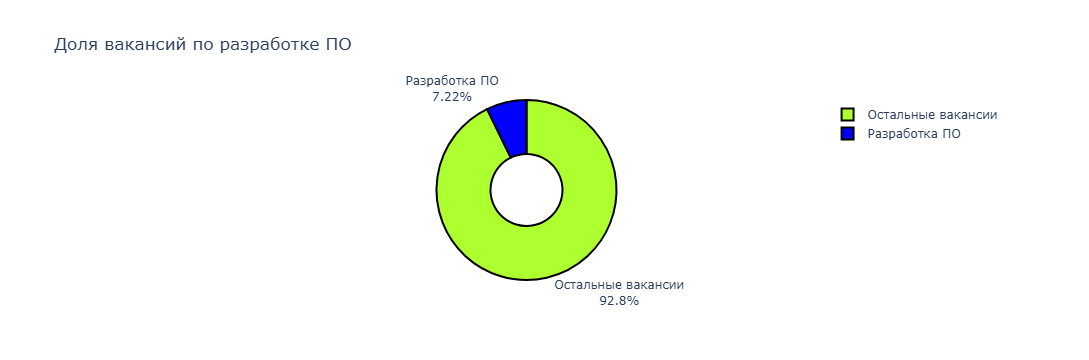

In [736]:
#выводим долю вакансий в сфере разработки ПО по сравнению с остальными
print(f'У {emp_developing_industry} работодателей указана сфера разработки ПО')
fig = px.pie(values=[emp_developing_industry, vacancies - emp_developing_industry], names=['Разработка ПО', 'Остальные вакансии'], title='Доля вакансий по разработке ПО', 
            color=['Разработка ПО', 'Остальные вакансии'],
            color_discrete_map={'Разработка ПО': 'blue', 'Остальные вакансии': 'GreenYellow'})
fig.update_traces(textinfo='percent+label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=0.4)
fig.show()

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [737]:
#отправляем запрос википедии чтобы получить список городов - миллионников
emp = 'Яндекс'
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
df_tmp = pd.read_html(url, storage_options={'User-Agent': 'Mozilla/5.0'})[0]

city = df_tmp['Город'].tolist()
#не забываем вернуть память, которую заняли
del df_tmp
gc.collect()

619

In [738]:
placeholders = ', '.join(['%s'] * len(city))
#получить id из таблицы employers
query = f'''select id from employers
where name = '{emp}'
        '''
df = pd.read_sql_query(query, connection)
id_emp = df['id'].iloc[0]
#получить список id из таблицы areas
query = f'''select id from areas
where name in ({placeholders})
        '''
df = pd.read_sql_query(query, connection, params=city)
area_id_list = df['id'].tolist()
#получить количество вакансий, разбитых по городам где employer_id == id яндекса и area_id == area городов - миллионников
placeholders = ', '.join(['%s'] * len(area_id_list))
query = f'''
    select  areas.name, count(vacancies.id) as cnt
from vacancies
join areas on vacancies.area_id = areas.id
where areas.id in ({placeholders}) and vacancies.employer_id = '{id_emp}'
group by areas.name
order by cnt asc
        '''
df = pd.read_sql_query(query, connection, params=area_id_list)
new_row = {'name': 'Total:', 'cnt': df['cnt'].sum()}
df_mil_yandex = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
#запоминаем число вакансий в миллионниках - нужно для доп исследования
mill_regions = df_mil_yandex['cnt'].iloc[-1]

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3080166921.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3080166921.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3080166921.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [739]:
print('Таблица регионов присутствия компании Яндекс по возрастанию числа вакансий: ')
print(df_mil_yandex)

Таблица регионов присутствия компании Яндекс по возрастанию числа вакансий: 
               name  cnt
0              Омск   21
1         Челябинск   22
2        Красноярск   23
3         Волгоград   24
4             Пермь   25
5            Казань   25
6    Ростов-на-Дону   25
7               Уфа   26
8            Самара   26
9         Краснодар   30
10          Воронеж   32
11      Новосибирск   35
12  Нижний Новгород   36
13     Екатеринбург   39
14  Санкт-Петербург   42
15           Москва   54
16           Total:  485


***

1) Яндекс самый крупный работодатель в выборке.
2) Наибольшее число работодателей в Москве, Санкт-Петербурге, Минске.
При этом работодателей из Москвы больше, чем вакансий. Возможно, активно размещают вакансии вне домашего региона
А еще в России зарегистрировано наибольшее число работадателей.
3) Яндекс ищет сотрудников по наибольшему числу регионов. Яндекс зарегистрирован в Москве, и как самый крупный работодатель имеет наибольшее число
вакансий. Делаю вывод, что наблюдение из п.2 касательно числа работодателей и вакансий в Москве связано с географией поиска Яндекса
4) У 8419 не указана сфера деятельности. Это довольно много(35.8%). Можно было бы исследовать такие компании, чтобы понять, чем они занимаются.
   Но нужно будет подтянуть инфо о компаниях откуда - нибудь еще.
5) 3553 компаний разрабатывают ПО, это очень маленькая доля(7.22%), судя по визуализации. Значит, разработчикам труднее искать работу на таком тонком рынке.
6) Компания Яндекс представлена по всех городах - миллионниках России
Интересно, насколько равномерно распределены вакансии в городах - миллионниках среди самих(цифры вроде говороят, что достаточно равномерно)
Это мы узнаем в доп исследовании.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [740]:
#могли бы выгрузить все данные и искать стредствами pandas, но у меня это выполнялось более 3-х минут
#и я сделал фильтрацию средстваим sql, так как на уровне бд эти операции организованы лусше
#далее буду пробовать фильровать стредствами sql
query = f'''select name from vacancies
where LOWER(name) like '%data%' or LOWER(name) like '%данн%'
         '''
df = pd.read_sql_query(query, connection)
ds_vac_count = df.shape[0]


C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3351830222.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [741]:
print(f'{ds_vac_count} вакансий имеют отношение к данным')
print(f'Это всего лишь {round(ds_vac_count / vacancies * 100, 2)} % из всех вакансий')

1771 вакансий имеют отношение к данным
Это всего лишь 3.6 % из всех вакансий


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [742]:
#Основную фильрацию сделал через sql - так быстрее и далее он нам еще потребуется
query = f'''select name, experience, employment from vacancies
where 
(lower(name) like '%data scientist%' 
or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%'
or lower(name) like '%machine learning%' 
or name ~* 'ML'
or name ~* 'машинн.*обучен'
 )
and lower(name) not like '%html%'
        '''
df = pd.read_sql_query(query, connection)
#и применил маску для доп условий(нужны джуны из выборки)
mask = (
    df['name'].str.contains('junior', case=False, na=False)|
    df['experience'].str.contains('Нет опыта', case=False, na=False) | 
    df['employment'].str.contains('Стажировка', case=False, na=False)
)

filtered_df = df[mask]
ds_vac_count_jun = filtered_df.shape[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3087786734.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [743]:
print(f'Имееется {ds_vac_count_jun} вакансия для начинающих дата - инженеров')
print(f'Это {round(ds_vac_count_jun / ds_vac_count * 100, 1)} % из всех вакансий для дата - инженеров')

Имееется 51 вакансия для начинающих дата - инженеров
Это 2.9 % из всех вакансий для дата - инженеров


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [744]:
#Основную фильрацию сделал через sql - так быстрее и далее он нам еще потребуется
query = f'''select name, key_skills from vacancies
where 
(lower(name) like '%data scientist%' 
or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%'
or lower(name) like '%machine learning%' 
or name ~* 'ML'
or name ~* 'машинн.*обучен'
 )
and lower(name) not like '%html%'
        '''

df = pd.read_sql_query(query, connection)

#и применил маску для доп условий(нужны упоминания о sql и postgres) добавил доп условие PostgreSQL
skills_pattern = r'SQL|postgres|PostgreSQL'

mask = df['key_skills'].astype(str).str.contains(skills_pattern, case=False, na=False)
filtered_df = df[mask]


vac_count_sql = filtered_df.shape[0]

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\3831380189.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [745]:
print(f'Есть {vac_count_sql} вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres')

Есть 229 вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [746]:
#Основную фильрацию сделал через sql - так быстрее и далее он нам еще потребуется
query = f'''select name, key_skills from vacancies
where 
(lower(name) like '%data scientist%' 
or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%'
or lower(name) like '%machine learning%' 
or name ~* 'ML'
or name ~* 'машинн.*обучен'
 )
and lower(name) not like '%html%'
        '''

df = pd.read_sql_query(query, connection)

#и применил маску для доп условий(нужны упоминания о sql и postgres) добавил доп условие PostgreSQL
skills_pattern = r'Python'

mask = df['key_skills'].astype(str).str.contains(skills_pattern, case=False, na=False)
filtered_df = df[mask]

vac_count_python = filtered_df.shape[0]


C:\Users\HP\AppData\Local\Temp\ipykernel_1076\397093185.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [747]:
print(f'Есть {vac_count_python} вакансий, в которых в качестве ключевого навыка указан Python')

Есть 357 вакансий, в которых в качестве ключевого навыка указан Python


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [748]:
#объединил общие условия по специалистам DS и добавил код согласно подсказкам на портале
#основная логика  если навыки разделены табуляцией, то количество навыков — это количество разделителей + 1
#здесь же опробовал опертор ilike, ему все равно на регистр)
query = f'''select
    avg(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1)
from vacancies
where key_skills is not null  
  and (
      (name ilike '%data scientist%' 
       or name ilike '%data science%'
       or name ilike '%исследователь данных%'
       or (name like '%ML%' and name not ilike '%html%') 
       or name ilike '%machine learning%' 
       or name ilike '%машинн%обучен%'
      )
      and name not ilike '%html%'
  )
'''


df = pd.read_sql_query(query, connection)
key_skills_count = df.iloc[0].item()
key_skills_count = round(key_skills_count,2)

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4185937513.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



 В среднем 6.41 указывают в вакансиях для DS
Дополнительно покажем, какая доля рынка у соискателей с навыком sql или python(объединение подмножеств) у дата саентиста


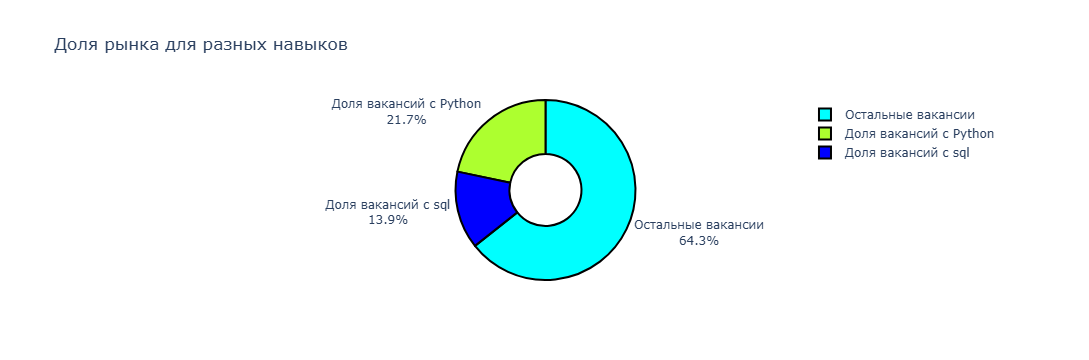

In [749]:
print(f' В среднем {key_skills_count} указывают в вакансиях для DS')
print('Дополнительно покажем, какая доля рынка у соискателей с навыком sql или python(объединение подмножеств) у дата саентиста')

fig = px.pie(values=[vac_count_sql, vac_count_python, ds_vac_count - (vac_count_python + vac_count_python)],
             names=['Доля вакансий c sql', 'Доля вакансий c Python','Остальные вакансии'], title='Доля рынка для разных навыков', 
            color=['Доля вакансий c sql', 'Доля вакансий c Python','Остальные вакансии'],
            color_discrete_map={'Доля вакансий c sql': 'blue', 'Доля вакансий c Python': 'GreenYellow', 'Остальные вакансии' : 'Cyan'})
fig.update_traces(textinfo='percent+label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=0.4)
fig.show()

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [750]:
#объединил общие условия по специалистам DS и добавил код расчета средней зп по всем вариантам опыта
#основная логика  если одна из вариантов зп не null, то можем рассчитать среднюю
#собственно, если одна из сторон вилки зп не указана, мы заменяем другой крайностью
query = f''' select 
    experience, 
    avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2.0) as avg_salary
from vacancies
where 
    (salary_from is not null or salary_to is not null) 
    and
    (
        (name ilike '%data scientist%' 
         or name ilike '%data science%'
         or name ilike '%исследователь данных%'
         or (name ~ '\yML\y' AND name not ilike '%HTML%')
         or name ilike '%machine learning%' 
         or name ilike '%машинн%обучен%')
        and name not ilike '%html%'
    )
group by experience;

'''
df = pd.read_sql_query(query, connection)
#округляем поле зп до целого
df['avg_salary'] = df['avg_salary'].round(0).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\2546847650.py:23: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [751]:
print('Градация уровня зп в зависимости от опыта работы: ')
print(df)

Градация уровня зп в зависимости от опыта работы: 
           experience  avg_salary
0           Нет опыта       74643
1  От 1 года до 3 лет      143417
2       От 3 до 6 лет      243115


1) Имеем 1771, которые имеют отношение к данным. Это всего 3.6% от всех вакансий. То есть рынок не требует большого количества 
специалистов по данным
При этом всего 51 вакансия для начинающих
2) из 1771 вакансии по работе с данными навык работы с sql нужен в 229 вакансиях. Это 13.9% всех вакансий по DS.
При этом 357 вакансий - это навыки работы с Python - 21.7%
То есть любому соискателю по DS нужно знать Python или sql и тогда можно навыками покрыть 35.6% вакансий и 
увеличить свои шансы на трудоустройство. Но начинающим будет труднее, так как для них вакансий всего 2.9% от всех вакансий по DS
Так как среднее число ключевых навыков в вакансиях равно 6.4, то только навыков Python и Sql будет недостаточно.
3) Стратегия с навыками рабочая, так как если средняя зп по вакансиям без опыта ~74 тр, то при опыте от года уже почти X2. Есть смысл начинать с малого, 
вкатываться с знаниями Python и sql на невысокую зп, в процессе добавлять навыки и регулярно мониторить рынок.

# Общий вывод по проекту

# подведем итог исследования, обобщите выводы. 

Основным выводом всего исследования - профиль текущего рынка труда, чтобы понять, куда соискателю двигатся
Что можно сказать о рынке труда в различных городах? и каких вакансий много(а каких мало)?

Работодатели предпочитают набирать сотрудников в основном из крупных финансовых центров: Москва, Санкт-Петербург, Минск, Новосибирск , Алматы.
Связано это с несколькими факторами:

1) самая популярная форма занятости - полный день в офисе. В тех же самых городах сконцентрировано большее число работодателей. Тогда предпочтительный формат работы логичен.
Сотудников рядом легче контролировать, в крупных городах лучше развита инфраструктура и уровень образования
Далее идет удаленная работа с полной занятостью. Это позволяет нанимать часть персонала в других регионах. Этим пользуется компания Яндекс, нанимая сотрудников в 181 регионе.

2) еще вывод из п.1 - найм в регионах позволяет экономить на издержках, ведь зарплаты в среднем варьируются от 71.065 рублей до 110.537 рублей, так как включены данные 
по всем вакансиям. При этом рынку нужны сотрудники с опытом работы от 1 года до 3 лет(53%) и от 3 лет до 6 лет(29%). Это для тех вакансий, где указан
опыт работы. То есть более половины вакансий требуют сравнительно
небольшой опыт работы, но чем выше опыт у соискателя, тем сложнее ему найти работу на открытом рынке.

4) разработка ПО и вакансии дата саентиста - не самые востребованные на рынке и готовы сотрудникам с опытом от 1 года до 3-х лет платить в среднем 143.417 рублей, 
в то время как более опытным(от 3 лет до 6 лет) сотрудникам уже 243.115 рублей(почти на 59% больше)
То есть ниша небольшая, но довольно денежная, учитывая общие средние зп среди всех вакансий.
Нужно развивать несколько навыков(около 6), обязательно Python, sql. Не указано явно, но еще нужны знания по линейной алгебре, математической статистике, знание основы архитектуры
и внутрянку алгоритмов машинного обучения и программного обеспечения.
Какие ещё интересные исследования можно провести? Неплохо дополнительно исследовать топ 6 ключевых навыков и как они влияют на
Мои умозаключения, к которым я пришел в процессе работы с данными вакансиями зп.

Если совсем сжато, то для успеха рекомендую:

- искать работу на компании из крупных городов на удаленке или жить в них и работать в офисе
- развивать экспертизу по 6 ключевым навыкам: Python, sql, ml, алгоритмы и структуры данных, математическая статистика, архитектура ПО, первое время готовиться к скромным заработкам
- по мере роста опыта мониторить рынок на предмет более интересных предложений, завести резюме и регулярно его обновлять

# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Зарплаты в среднем варьируются от 71.065 рублей до 110.537 рублей.

Вычислив среднюю вилку по зп в топ 5 городов по числу вакансий, убеждаемся, что там зп больше.

Посмотреть это можно на визуализации ниже.

Думаю. если посчитать в топ 5 городах и остальных отдельно, разрыв будет еще больше.

Вывод: в самых крупных городах по числу вакансий и самые большие зарплаты.
Подтверждаю вывод о том, что в крупных городах больше возможностей для поиска работы и росте в зарплате.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4112502278.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4112502278.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4112502278.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



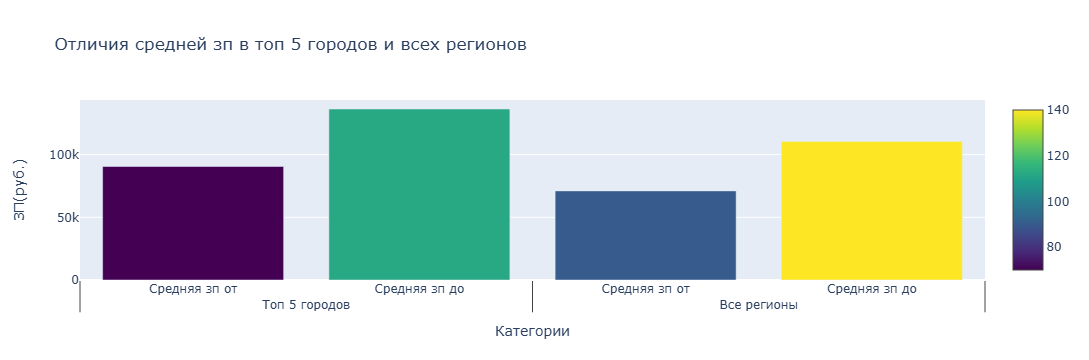

In [752]:
#города, в которых будем считать зп
city = ['Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск' , 'Алматы']
#получаем id нужных нам городов
placeholders = ', '.join(['%s'] * len(city))
query_tmp = f'''
select id from areas where areas.name in ({placeholders})
'''
df_query_tmp = pd.read_sql_query(query_tmp, connection, params=city)

id_list = df_query_tmp['id'].tolist()

#получаем зп в нужных нам городах
placeholders = ', '.join(['%s'] * len(id_list))

query_salary_from_top = f'''select round(avg(salary_from)) from vacancies 
where area_id in ({placeholders})
        '''
df_salary_from_top = pd.read_sql_query(query_salary_from_top, connection,  params=id_list)
query_salary_to_top = f'''select round(avg(salary_to)) from vacancies 
where area_id in ({placeholders})
        '''
df_salary_to_top = pd.read_sql_query(query_salary_to_top, connection,  params=id_list)

mean_salary_from_top = df_salary_from_top.iloc[0].item()
mean_salary_to_top  = df_salary_to_top.iloc[0].item()


# Данные: первый список — основная группа, второй — подгруппа
x = [
    ['Топ 5 городов', 'Все регионы', 'Топ 5 городов', 'Все регионы'],
    ['Средняя зп от', 'Средняя зп от', 'Средняя зп до', 'Средняя зп до']
]

fig = go.Figure()
fig.add_bar(x=x, y=[mean_salary_from_top, mean_salary_from, mean_salary_to_top, mean_salary_to],
            marker=dict(
        color=[70, 90, 112, 140], 
        colorscale='Viridis',       
        showscale=True              
    ))

fig.update_layout(title="Отличия средней зп в топ 5 городов и всех регионов")
fig.update_layout(
    yaxis_title="ЗП(руб.)",
    xaxis_title="Категории")
fig.show()


Компания Яндекс представлена по всех городах - миллионниках России.

Дополнительно выяснили, что во всех городах - миллионниках, кроме Москвы, Санкт - Петербурга, Екатеринбурга, Омска вакансии распределены очень равномерно(меньше 1 стандартного отклонения).

Учитывая, что в крупных городах выше зарплаты, а таких сотрудников Яндекс набирает всего 25% от всего найма, видим, что Яндекс экономит на зарплатах
за счет найма в разных регионах, при этом это возможность работать в крупной компании из регионов.


Подробнее см расчеты и визуализацию ниже.

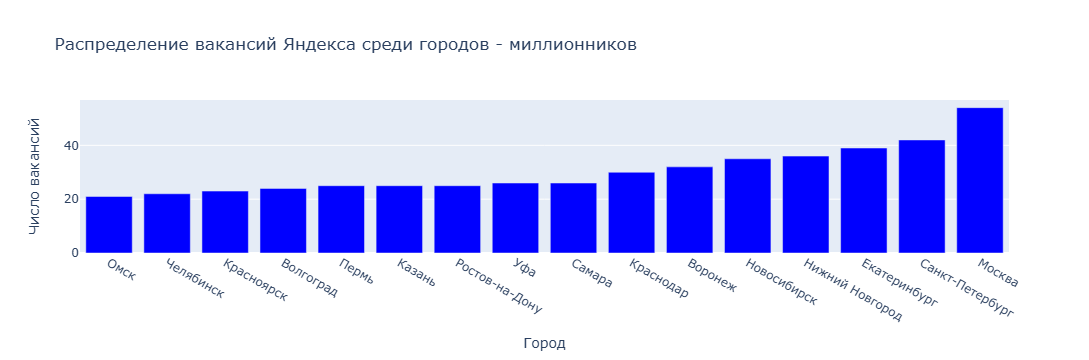

Среднее число вакансий 30
Отклонение от среднего 8
У 3 городов число вакансий больше 1-й сигмы
13       Екатеринбург
14    Санкт-Петербург
15             Москва
Name: name, dtype: object
У 1 городов число вакансий меньше 1-й сигмы
0    Омск
Name: name, dtype: object
Компания Яндекс набирает 485 сотрудников в миллионниках
И также набирает 1448 сотрудников в других регионах, экономя на зарплате


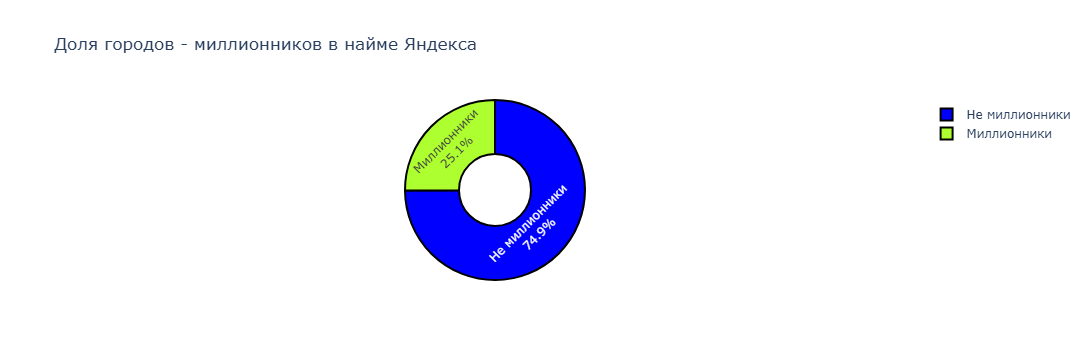

In [753]:
#удаляем последнюю строку, чтобы не портить визуализацию
df_mil_yandex = df_mil_yandex.drop(df_mil_yandex[df_mil_yandex['name'] == 'Total:'].index)
#отрисовываем распределение вакансий в городах - миллионниках
fig1 = px.bar(x = df_mil_yandex['name'],y=df_mil_yandex['cnt'], title=f'Распределение вакансий Яндекса среди городов - миллионников',
              labels = {'x': 'Город', 'y': 'Число вакансий'},color_discrete_sequence=['blue'])
fig1.show()
#считаем основные метрики для анализа(среднее, стандартное отклонение, число городов ,которые отклоняются)
#и сами города
mean = int(df_mil_yandex['cnt'].mean())
std = int(df_mil_yandex['cnt'].std())
city_std_big_df = df_mil_yandex[df_mil_yandex['cnt'] > (mean + std)]
city_std_little_df = df_mil_yandex[df_mil_yandex['cnt'] < (mean - std)]

city_std_big = city_std_big_df.shape[0]
city_std_little = city_std_little_df.shape[0]
#выводим основные метрики и долю вакансий в городах миллионниках и остальных
print(f'Среднее число вакансий {mean}')
print(f'Отклонение от среднего {std}')
print(f'У {city_std_big} городов число вакансий больше 1-й сигмы')
print(city_std_big_df['name'])
print(f'У {city_std_little} городов число вакансий меньше 1-й сигмы')
print(city_std_little_df['name'])
print(f'Компания Яндекс набирает {mill_regions} сотрудников в миллионниках')
print(f'И также набирает {first_vac - mill_regions} сотрудников в других регионах, экономя на зарплате')
fig = px.pie(values=[mill_regions, first_vac - mill_regions], names=['Миллионники', 'Не миллионники'], 
             title='Доля городов - миллионников в найме Яндекса', 
            color=['Миллионники', 'Не миллионники'],
            color_discrete_map={'Не миллионники': 'blue', 'Миллионники': 'GreenYellow'})
fig.update_traces(textinfo='percent+label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_traces(hole=0.4)
fig.show()